# Web Scraping With Python

In [1]:
#Importing Libraries

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Navigating the web browser

driver = webdriver.Chrome("D:/chromedriver")

In [3]:
#Scraping the Mobile&Accessoies section from Amazon where min price:10,000 & max price:50,000

driver.get("https://www.amazon.in/s?k=mobile+phones&i=electronics&rh=n%3A1389401031%2Cp_36%3A1000000-5000000&qid=1598347347&rnid=1318502031&ref=sr_nr_p_36_5")
content = driver.page_source
soup =BeautifulSoup(content)

In [4]:
#represents the document as a nested data structure

print(soup.prettify())

<html class="a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.20.6-2020-08-18" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script async="" crossorigin="anonymous" src="https://images-eu.ssl-images-amazon.com/images/I/31BVuidgT8L.js">
  </script>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script>
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" re

In [5]:
#Creating lists to append each object
models=[]
prices=[]
ratings=[]

#Getting info through inspect from amazon shopping browser
for a in soup.findAll('div', attrs={'class':'s-include-content-margin s-border-bottom s-latency-cf-section'}):
    
    model=a.find('span', attrs={'class':'a-size-medium a-color-base a-text-normal'})
    price=a.find('span', attrs={'class':'a-price-whole'})
    rating=a.find('span',attrs={'class':'a-icon-alt'})
    
    #Scrapping the model name, price & rating of each item 
    models.append(model.text)
    if rating is None:
        ratings.append('-1')
    else:
        ratings.append(rating.text)
        
    if price is None:
        prices.append('-1')
    else:
        prices.append(price.text)

    #Creating a dataframe and saving it as a CSV file
    df=pd.DataFrame({'Model_Name':models,'Price':prices,'Rating':ratings})
    df.to_csv('mobile&accessories.csv', index=False, encoding='utf-8')

In [6]:
df.head()

,Model_Name,Price,Rating
0,Apple iPhone 7 (32GB) - Black,"29,499",4.2 out of 5 stars
1,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...","13,999",4.2 out of 5 stars
2,"Vivo U10 (Electric Blue, 5000 mAH 18W Fast Cha...","10,990",4.3 out of 5 stars
3,"OPPO A5 2020 (Dazzling White, 4GB RAM, 64GB St...","11,990",4.1 out of 5 stars
4,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...","17,499",4.3 out of 5 stars


In [7]:
df.shape

(25, 3)

In [8]:
#Scrapping the rating no. & converting into numeric

df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df['Rating'] = pd.to_numeric(df['Rating'])

In [9]:
#Replacing the ',', from price & coverting into numeric

df["Price"] = df["Price"].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

In [10]:
df.head()

,Model_Name,Price,Rating
0,Apple iPhone 7 (32GB) - Black,29499,4.2
1,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",13999,4.2
2,"Vivo U10 (Electric Blue, 5000 mAH 18W Fast Cha...",10990,4.3
3,"OPPO A5 2020 (Dazzling White, 4GB RAM, 64GB St...",11990,4.1
4,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...",17499,4.3


In [11]:
#Keeping price value range starts at 10,000/-

df = df[df['Price']>10000]

In [12]:
#Removing the Outliers

df = df[df['Rating']>=0]

In [13]:
df.shape

(23, 3)

# Visualization

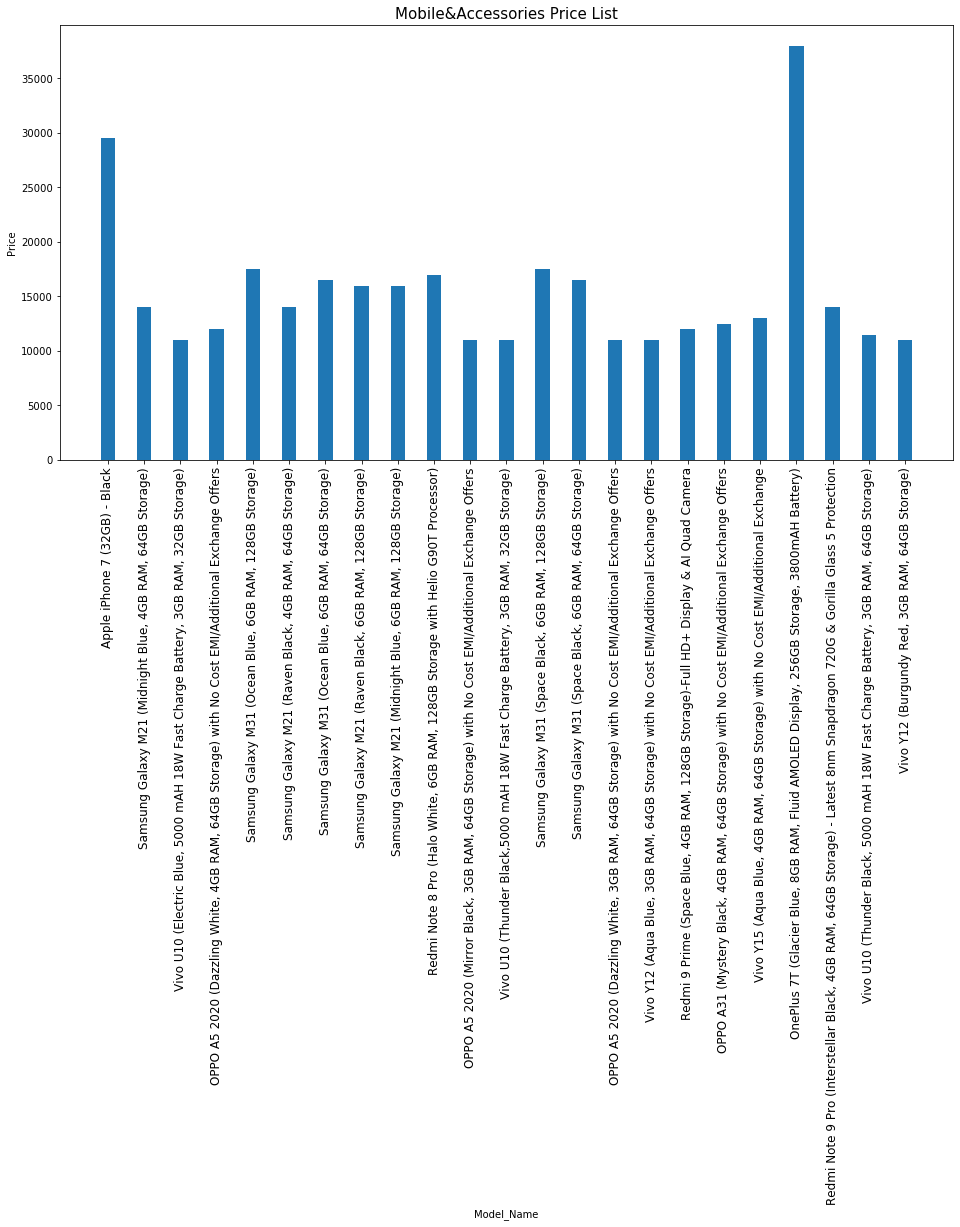

In [14]:
# creating the bar plot 

fig = plt.figure(figsize = (16, 8)) 
plt.bar(df.Model_Name, df.Price, width = 0.4) 
  
plt.xlabel("Model_Name") 
plt.ylabel("Price")
plt.xticks(df.Model_Name, fontsize=12, rotation=90)
plt.title("Mobile&Accessories Price List",fontsize=15)
plt.show()

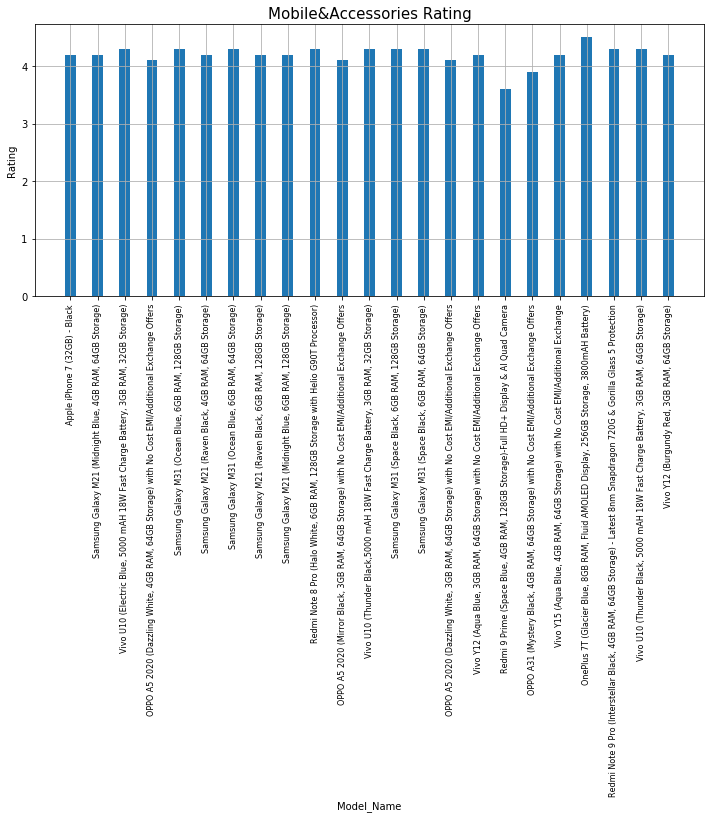

In [15]:
# creating the bar plot

fig = plt.figure(figsize = (12, 5)) 
plt.bar(df.Model_Name, df.Rating, width = 0.4) 
  
plt.xlabel("Model_Name") 
plt.ylabel("Rating")
plt.xticks(df.Model_Name, fontsize=8, rotation=90)
plt.title("Mobile&Accessories Rating",fontsize=15)
plt.grid()